<a href="https://colab.research.google.com/github/ronsupreme/BaiTH4/blob/main/BaiTH4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [17]:
# Triển khai thuật toán K-means
class KMeans:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.inertia = None  # Tổng bình phương khoảng cách từ mỗi điểm tới centroid gần nhất
        self.iterations = 0  # Số vòng lặp thực tế

    def initialize_centroids(self, data):
        # Khởi tạo centroids bằng cách chọn ngẫu nhiên từ dữ liệu
        idx = np.random.choice(len(data), self.n_clusters, replace=False)
        self.centroids = data[idx].copy()

    def assign_labels(self, data):
        # Gán nhãn cho từng điểm dữ liệu (tìm centroid gần nhất)
        dist = np.zeros((len(data), self.n_clusters))

        for k in range(self.n_clusters):
            # Tính khoảng cách Euclidean giữa mỗi điểm và centroid
            dist[:, k] = np.sqrt(np.sum((data - self.centroids[k])**2, axis=1))

        # Gán mỗi điểm cho centroid gần nhất
        self.labels = np.argmin(dist, axis=1)

    def update_centroids(self, data):
        # Cập nhật vị trí của các centroid
        old_centroids = self.centroids.copy()

        for k in range(self.n_clusters):
            # Lấy tất cả các điểm được gán cho cluster k
            points_in_cluster = data[self.labels == k]

            # Nếu không có điểm nào trong cluster, giữ nguyên centroid cũ
            if len(points_in_cluster) > 0:
                self.centroids[k] = np.mean(points_in_cluster, axis=0)

        # Tính sự thay đổi của các centroid
        centroid_shift = np.linalg.norm(self.centroids - old_centroids)
        return centroid_shift

    def calculate_inertia(self, data):
        # Tính tổng bình phương khoảng cách từ mỗi điểm tới centroid của nó
        inertia = 0
        for k in range(self.n_clusters):
            points_in_cluster = data[self.labels == k]
            if len(points_in_cluster) > 0:
                inertia += np.sum((points_in_cluster - self.centroids[k])**2)

        self.inertia = inertia
        return inertia

    def fit(self, data):
        # Khởi tạo centroids
        self.initialize_centroids(data)

        # Lặp lại quá trình EM cho đến khi hội tụ hoặc đạt số lần lặp tối đa
        for iteration in range(self.max_iters):
            # E-step: Gán nhãn cho từng điểm dữ liệu
            self.assign_labels(data)

            # M-step: Cập nhật vị trí của các centroid
            centroid_shift = self.update_centroids(data)

            # Tính inertia
            inertia = self.calculate_inertia(data)

            # Lưu số vòng lặp
            self.iterations = iteration + 1

            # Kiểm tra điều kiện hội tụ
            if centroid_shift < self.tol:
                print(f"Hội tụ sau {iteration+1} vòng lặp!")
                break

        return self

    def predict(self, data):
        # Dự đoán cluster cho dữ liệu mới
        dist = np.zeros((len(data), self.n_clusters))

        for k in range(self.n_clusters):
            dist[:, k] = np.sqrt(np.sum((data - self.centroids[k])**2, axis=1))

        return np.argmin(dist, axis=1)

# Đánh giá hiệu suất của K-means
def evaluate_kmeans(data, true_labels, n_runs=5):
    results = []

    for run in range(n_runs):
        # Khởi tạo và huấn luyện mô hình K-means
        kmeans = KMeans(n_clusters=3, max_iters=100, tol=1e-4)
        kmeans.fit(data)

        # Lưu kết quả
        results.append({
            'run': run + 1,
            'inertia': kmeans.inertia,
            'centroids': kmeans.centroids.copy(),
            'labels': kmeans.labels.copy(),
            'iterations': kmeans.iterations
        })

    return results

### Assignment 1 (4 scores):

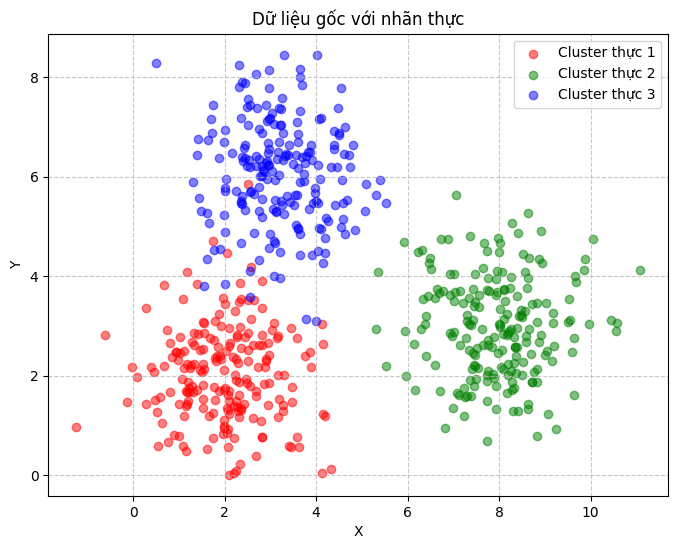

Hội tụ sau 7 vòng lặp!
Hội tụ sau 4 vòng lặp!
Hội tụ sau 4 vòng lặp!
Hội tụ sau 13 vòng lặp!
Hội tụ sau 7 vòng lặp!
Kết quả tốt nhất (Run 2): Inertia = 1121.84


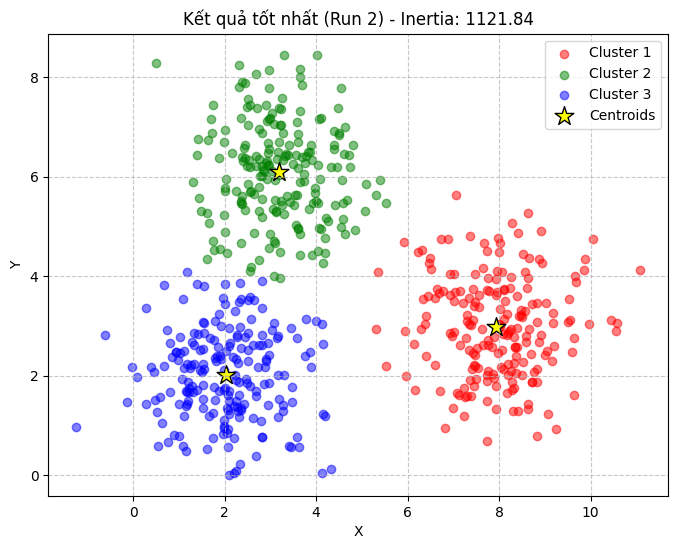

Kết quả xấu nhất (Run 4): Inertia = 2785.82


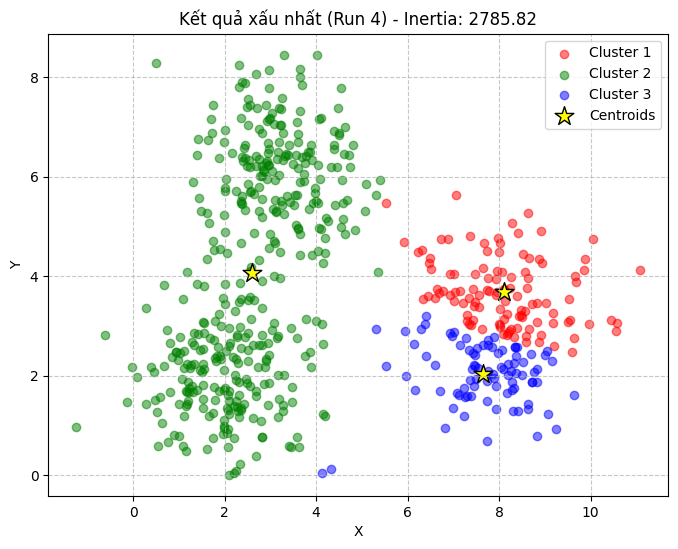


Kết quả:
Run 1: Inertia = 1121.86
Run 2: Inertia = 1121.84
Run 3: Inertia = 1121.84
Run 4: Inertia = 2785.82
Run 5: Inertia = 1121.86
Chênh lệch inertia giữa lần chạy tốt nhất và xấu nhất: 1663.97


In [18]:
def generate_data():
    # Ma trận hiệp phương sai (covariance matrix)
    cov = np.array([[1, 0], [0, 1]])

    # Tạo 200 điểm từ phân phối Gaussian thứ nhất: N((2,2), Σ)
    cluster1 = np.random.multivariate_normal(mean=[2, 2], cov=cov, size=200)

    # Tạo 200 điểm từ phân phối Gaussian thứ hai: N((8,3), Σ)
    cluster2 = np.random.multivariate_normal(mean=[8, 3], cov=cov, size=200)

    # Tạo 200 điểm từ phân phối Gaussian thứ ba: N((3,6), Σ)
    cluster3 = np.random.multivariate_normal(mean=[3, 6], cov=cov, size=200)

    # Gộp tất cả các điểm dữ liệu lại
    data = np.vstack((cluster1, cluster2, cluster3))

    # Lưu nhãn thực tế cho mục đích đánh giá
    true_labels = np.hstack((np.zeros(200), np.ones(200), np.ones(200) * 2))

    return data, true_labels


# Trực quan hóa kết quả clustering
def visualize_clusters(data, labels, centroids, title):
    plt.figure(figsize=(8, 6))

    # Vẽ các điểm dữ liệu theo từng cluster
    colors = ['r', 'g', 'b']
    for k in range(3):
        cluster_points = data[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], alpha=0.5, label=f'Cluster {k+1}')

    # Vẽ các centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='*', edgecolors='black', label='Centroids')

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

if __name__ == "__main__":
    data, true_labels = generate_data()

    # Vẽ dữ liệu gốc
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for k in range(3):
        cluster_points = data[true_labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], alpha=0.5, label=f'Cluster thực {k+1}')

    plt.title('Dữ liệu gốc với nhãn thực')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Đánh giá khởi tạo ngẫu nhiên với nhiều lần chạy
    results = evaluate_kmeans(data, true_labels)

    # Sắp xếp kết quả theo inertia (giá trị càng thấp càng tốt)
    sorted_results = sorted(results, key=lambda x: x['inertia'])

    # Hiển thị kết quả tốt nhất và xấu nhất để so sánh
    best_run = sorted_results[0]
    worst_run = sorted_results[-1]

    print(f"Kết quả tốt nhất (Run {best_run['run']}): Inertia = {best_run['inertia']:.2f}")
    visualize_clusters(data, best_run['labels'], best_run['centroids'],
                      f"Kết quả tốt nhất (Run {best_run['run']}) - Inertia: {best_run['inertia']:.2f}")

    print(f"Kết quả xấu nhất (Run {worst_run['run']}): Inertia = {worst_run['inertia']:.2f}")
    visualize_clusters(data, worst_run['labels'], worst_run['centroids'],
                      f"Kết quả xấu nhất (Run {worst_run['run']}) - Inertia: {worst_run['inertia']:.2f}")

    # Tóm tắt tất cả các lần chạy
    print("\nKết quả:")
    for result in results:
        print(f"Run {result['run']}: Inertia = {result['inertia']:.2f}")

    print(f"Chênh lệch inertia giữa lần chạy tốt nhất và xấu nhất: {worst_run['inertia'] - best_run['inertia']:.2f}")

**Nhận xét về ảnh hưởng của việc khởi tạo ngẫu nhiên các centroids:**
1. Khởi tạo ngẫu nhiên các centroids có thể dẫn đến kết quả khác nhau giữa các lần chạy.
2. Chênh lệch inertia giữa lần chạy tốt nhất và xấu nhất: 1663.97
3. Thuật toán K-means có thể hội tụ đến cực tiểu cục bộ khác nhau tùy thuộc vào vị trí ban đầu của các centroids.

### Assignment 2 (4 scores):

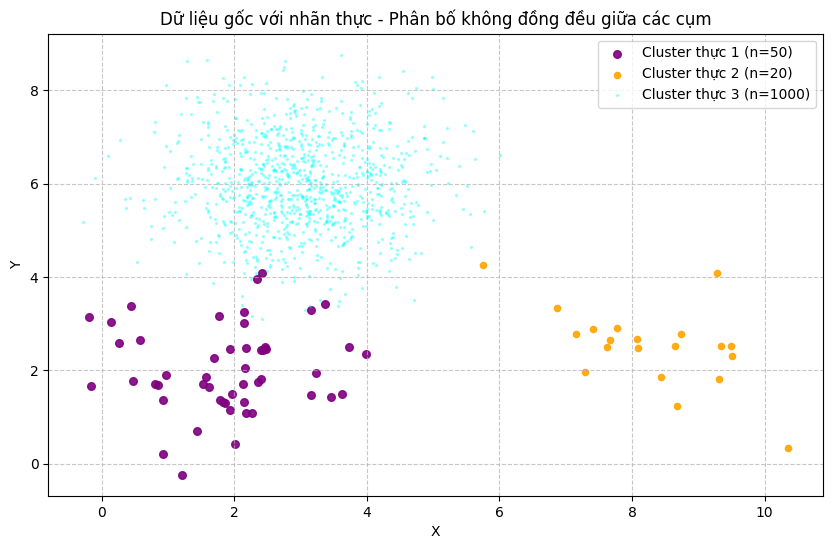

Hội tụ sau 14 vòng lặp!
Hội tụ sau 23 vòng lặp!
Hội tụ sau 25 vòng lặp!
Hội tụ sau 30 vòng lặp!
Hội tụ sau 44 vòng lặp!

Kết quả tốt nhất (Run 2): Inertia = 1910.13

Thông tin về các cụm:
Cụm 1: Kích thước = 604, Tâm cụm = [2.55561479 6.41059067]
Cụm 2: Kích thước = 309, Tâm cụm = [4.36557708 5.51584797]
Cụm 3: Kích thước = 157, Tâm cụm = [2.2605378  3.66578561]


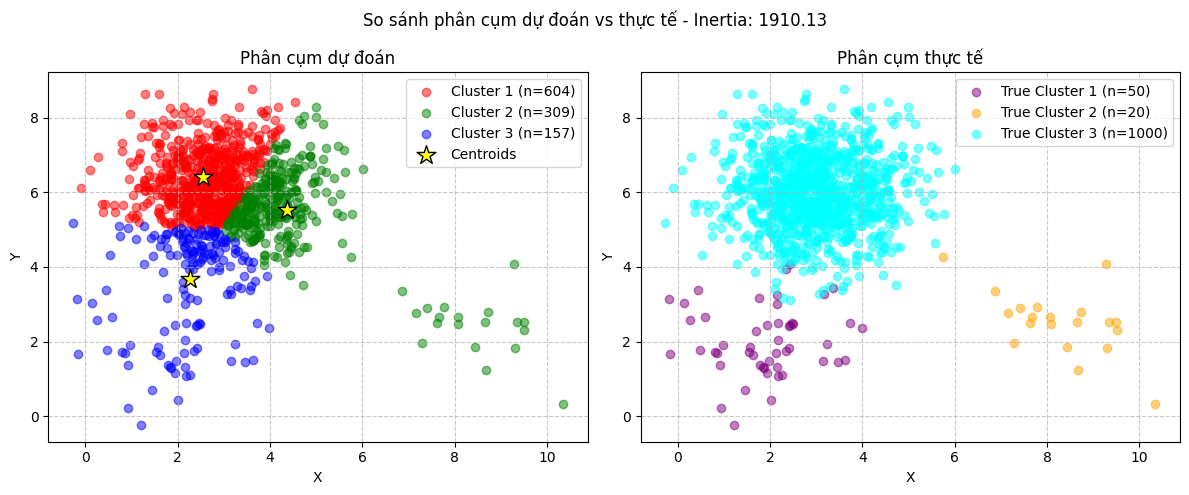

In [19]:
def generate_data():
    # Ma trận hiệp phương sai (covariance matrix)
    cov = np.array([[1, 0], [0, 1]])

    # Tạo 50 điểm từ phân phối Gaussian thứ nhất: N((2,2), Σ)
    cluster1 = np.random.multivariate_normal(mean=[2, 2], cov=cov, size=50)

    # Tạo 20 điểm từ phân phối Gaussian thứ hai: N((8,3), Σ)
    cluster2 = np.random.multivariate_normal(mean=[8, 3], cov=cov, size=20)

    # Tạo 1000 điểm từ phân phối Gaussian thứ ba: N((3,6), Σ)
    cluster3 = np.random.multivariate_normal(mean=[3, 6], cov=cov, size=1000)

    # Gộp tất cả các điểm dữ liệu lại
    data = np.vstack((cluster1, cluster2, cluster3))

    # Lưu nhãn thực tế cho mục đích đánh giá
    true_labels = np.hstack((np.zeros(50), np.ones(20), np.ones(1000) * 2))

    return data, true_labels


# Tính toán các số liệu thống kê về cụm
def calculate_cluster_stats(data, labels):
    cluster_stats = []

    for k in range(3):  # Với 3 cụm
        points_in_cluster = data[labels == k]
        cluster_stats.append({
            'size': len(points_in_cluster),
            'mean': np.mean(points_in_cluster, axis=0) if len(points_in_cluster) > 0 else None
        })

    return cluster_stats

# Đánh giá sự phù hợp giữa kết quả clustering và ground truth
def calculate_cluster_matching(pred_labels, true_labels):
    # Tính toán ma trận confusion
    confusion_matrix = np.zeros((3, 3))

    for i in range(3):  # Đối với mỗi nhãn dự đoán
        for j in range(3):  # Đối với mỗi nhãn thực
            confusion_matrix[i, j] = np.sum((pred_labels == i) & (true_labels == j))

    return confusion_matrix

# Trực quan hóa kết quả clustering
def visualize_clusters(data, labels, centroids, true_labels, title):
    plt.figure(figsize=(12, 5))

    # Vẽ phân cụm dự đoán
    plt.subplot(1, 2, 1)
    colors = ['r', 'g', 'b']
    for k in range(3):
        cluster_points = data[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], alpha=0.5,
                    label=f'Cluster {k+1} (n={len(cluster_points)})')

    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='*',
                edgecolors='black', label='Centroids')

    plt.title('Phân cụm dự đoán')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Vẽ phân cụm thực tế
    plt.subplot(1, 2, 2)
    colors = ['purple', 'orange', 'cyan']
    for k in range(3):
        cluster_points = data[true_labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], alpha=0.5,
                    label=f'True Cluster {k+1} (n={len(cluster_points)})')

    plt.title('Phân cụm thực tế')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    data, true_labels = generate_data()

    # Vẽ dữ liệu gốc
    plt.figure(figsize=(10, 6))
    colors = ['purple', 'orange', 'cyan']
    sizes = [30, 20, 2]  # Kích thước marker để phân biệt các cụm
    alphas = [0.9, 0.9, 0.3]  # Độ trong suốt để nhìn rõ các cụm

    for k in range(3):
        cluster_points = data[true_labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k],
                    s=sizes[k], alpha=alphas[k],
                    label=f'Cluster thực {k+1} (n={len(cluster_points)})')

    plt.title('Dữ liệu gốc với nhãn thực - Phân bố không đồng đều giữa các cụm')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Đánh giá K-means
    results = evaluate_kmeans(data, true_labels)

    # Sắp xếp kết quả theo inertia (giá trị càng thấp càng tốt)
    sorted_results = sorted(results, key=lambda x: x['inertia'])

    # Hiển thị kết quả tốt nhất để phân tích
    best_run = sorted_results[0]
    print(f"\nKết quả tốt nhất (Run {best_run['run']}): Inertia = {best_run['inertia']:.2f}")

    # Tính toán số liệu thống kê cho cụm tốt nhất
    best_cluster_stats = calculate_cluster_stats(data, best_run['labels'])

    # Hiển thị thông tin về các cụm
    print("\nThông tin về các cụm:")
    for i, stats in enumerate(best_cluster_stats):
        print(f"Cụm {i+1}: Kích thước = {stats['size']}, Tâm cụm = {stats['mean']}")

    # Trực quan hóa kết quả
    visualize_clusters(data, best_run['labels'], best_run['centroids'], true_labels,
                      f"So sánh phân cụm dự đoán vs thực tế - Inertia: {best_run['inertia']:.2f}")


**Nhận xét về ảnh hưởng của kích thước khác nhau giữa các cụm đến hiệu suất của K-means:**
1. Sự phân bố không đồng đều (50, 20, 1000 điểm) trong các cụm làm cho K-means thiên vị hướng tới cụm lớn.
2. Cụm lớn có ảnh hưởng lớn hơn đến vị trí của các tâm cụm (centroids) so với các cụm nhỏ.
3. Thuật toán có xu hướng chia cụm lớn thành nhiều cụm con thay vì nhận diện các cụm nhỏ.
4. Cụm nhỏ có thể bị coi là nhiễu hoặc bị gộp với cụm lớn hơn gần đó.
5. Khả năng phát hiện cụm nhỏ bị hạn chế, đặc biệt nếu cụm nhỏ nằm xa các cụm lớn.
6. Kết quả cuối cùng có thể không phản ánh chính xác cấu trúc thực của dữ liệu với kích thước cụm không đồng đều.

### Assignment 3 (2 scores):

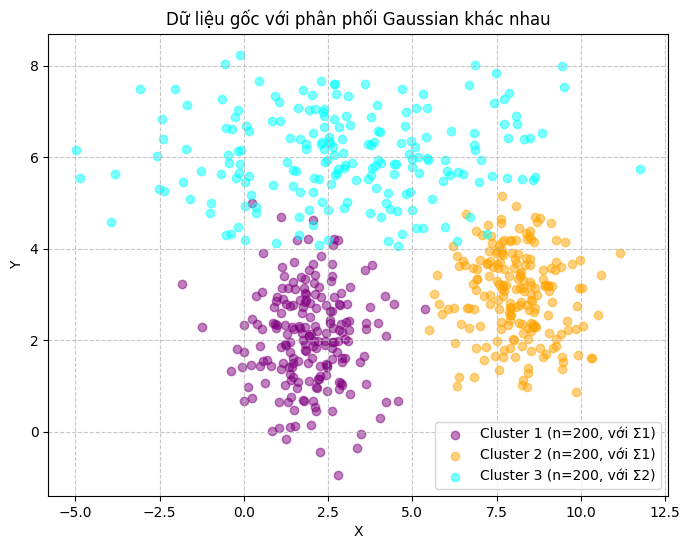

Phân tích ma trận hiệp phương sai thực tế của mỗi cụm:
Cụm 1:
- Ma trận hiệp phương sai:
[[ 1.13087063 -0.02381416]
 [-0.02381416  1.13428613]]
- Phương sai theo trục X: 1.1252
- Phương sai theo trục Y: 1.1286

Cụm 2:
- Ma trận hiệp phương sai:
[[ 1.07145467 -0.10284789]
 [-0.10284789  0.87598909]]
- Phương sai theo trục X: 1.0661
- Phương sai theo trục Y: 0.8716

Cụm 3:
- Ma trận hiệp phương sai:
[[9.29099046 0.20451669]
 [0.20451669 0.92058612]]
- Phương sai theo trục X: 9.2445
- Phương sai theo trục Y: 0.9160

Hội tụ sau 7 vòng lặp!
Hội tụ sau 18 vòng lặp!
Hội tụ sau 18 vòng lặp!
Hội tụ sau 10 vòng lặp!
Hội tụ sau 17 vòng lặp!

Kết quả tốt nhất (Run 1): Inertia = 2249.38

Thông tin về các cụm dự đoán:
Cụm 1: Kích thước = 165
- Tâm cụm = [1.87873164 5.92026786]
- Phương sai theo trục X: 5.0314
- Phương sai theo trục Y: 0.9656
Cụm 2: Kích thước = 244
- Tâm cụm = [7.90830254 3.53563536]
- Phương sai theo trục X: 1.3393
- Phương sai theo trục Y: 2.2403
Cụm 3: Kích thước = 191
- Tâm cụm 

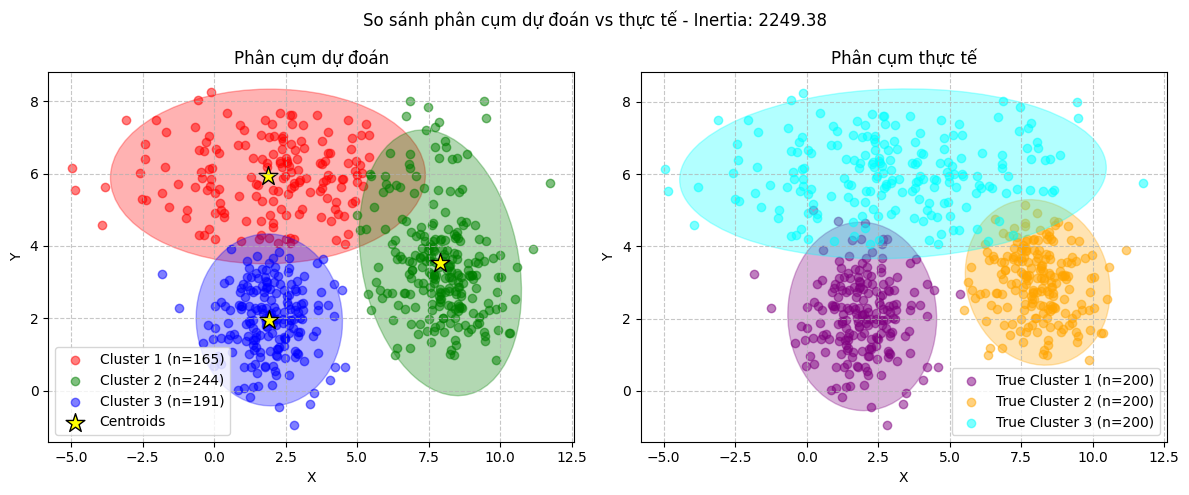

In [20]:
def generate_data():
    # Ma trận hiệp phương sai 1 (covariance matrix) - ma trận đơn vị
    cov1 = np.array([[1, 0], [0, 1]])

    # Ma trận hiệp phương sai 2 với phương sai lớn hơn theo trục x
    cov2 = np.array([[10, 0], [0, 1]])

    # Tạo 200 điểm từ phân phối Gaussian thứ nhất: N((2,2), Σ1)
    cluster1 = np.random.multivariate_normal(mean=[2, 2], cov=cov1, size=200)

    # Tạo 200 điểm từ phân phối Gaussian thứ hai: N((8,3), Σ1)
    cluster2 = np.random.multivariate_normal(mean=[8, 3], cov=cov1, size=200)

    # Tạo 200 điểm từ phân phối Gaussian thứ ba: N((3,6), Σ2)
    cluster3 = np.random.multivariate_normal(mean=[3, 6], cov=cov2, size=200)

    # Gộp tất cả các điểm dữ liệu lại
    data = np.vstack((cluster1, cluster2, cluster3))

    # Lưu nhãn thực tế cho mục đích đánh giá
    true_labels = np.hstack((np.zeros(200), np.ones(200), np.ones(200) * 2))

    return data, true_labels



# Tính toán các số liệu thống kê về cụm
def calculate_cluster_stats(data, labels):
    cluster_stats = []

    for k in range(3):  # Với 3 cụm
        points_in_cluster = data[labels == k]
        if len(points_in_cluster) > 0:
            # Tính toán ma trận hiệp phương sai của cụm
            cov = np.cov(points_in_cluster.T)
            cluster_stats.append({
                'size': len(points_in_cluster),
                'mean': np.mean(points_in_cluster, axis=0),
                'cov': cov,
                'var_x': np.var(points_in_cluster[:, 0]),
                'var_y': np.var(points_in_cluster[:, 1])
            })
        else:
            cluster_stats.append({
                'size': 0,
                'mean': None,
                'cov': None,
                'var_x': None,
                'var_y': None
            })

    return cluster_stats

# Tính đo phân phối các điểm trong cụm theo nhãn thực tế
def calculate_distribution(labels, true_labels):
    distribution = np.zeros((3, 3))  # Ma trận 3x3 để lưu phân phối

    for i in range(3):  # Duyệt qua các nhãn dự đoán
        pred_indices = (labels == i)
        for j in range(3):  # Duyệt qua các nhãn thực
            true_indices = (true_labels == j)
            # Số điểm có nhãn dự đoán i và nhãn thực j
            distribution[i, j] = np.sum(pred_indices & true_indices)

    return distribution

# Trực quan hóa kết quả clustering và phân phối điểm theo hình elip
def visualize_clusters_with_ellipses(data, labels, centroids, true_labels, title):
    from matplotlib.patches import Ellipse

    # Hàm vẽ ellipse dựa trên ma trận hiệp phương sai
    def plot_ellipse(ax, mean, cov, color):
        # Tính eigenvalues và eigenvectors của ma trận hiệp phương sai
        eigenvals, eigenvecs = np.linalg.eigh(cov)

        # Thứ tự của eigenvalues có thể bị đảo ngược
        order = eigenvals.argsort()[::-1]
        eigenvals = eigenvals[order]
        eigenvecs = eigenvecs[:, order]

        # Tính góc nghiêng của ellipse
        theta = np.degrees(np.arctan2(*eigenvecs[:, 0][::-1]))

        # Vẽ ellipse đại diện cho 95% dữ liệu (2 standard deviations)
        width, height = 2 * np.sqrt(5.991 * eigenvals)  # Chi-squared với df=2, p=0.05 là 5.991
        ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta,
                         alpha=0.3, color=color, fill=True)
        ax.add_patch(ellipse)

    plt.figure(figsize=(12, 5))

    # Vẽ phân cụm dự đoán với ellipses
    ax1 = plt.subplot(1, 2, 1)
    colors = ['r', 'g', 'b']

    # Tính statistics cho từng cụm để vẽ ellipses
    cluster_stats = calculate_cluster_stats(data, labels)

    for k in range(3):
        cluster_points = data[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], alpha=0.5,
                   label=f'Cluster {k+1} (n={len(cluster_points)})')

        # Vẽ ellipse cho cụm nếu có đủ điểm
        if cluster_stats[k]['size'] > 2:  # Cần ít nhất 2 điểm để tính ma trận hiệp phương sai
            plot_ellipse(ax1, cluster_stats[k]['mean'], cluster_stats[k]['cov'], colors[k])

    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='*',
               edgecolors='black', label='Centroids')

    plt.title('Phân cụm dự đoán')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Vẽ phân cụm thực tế với ellipses
    ax2 = plt.subplot(1, 2, 2)
    colors = ['purple', 'orange', 'cyan']

    # Tính statistics cho từng cụm thực tế để vẽ ellipses
    true_cluster_stats = calculate_cluster_stats(data, true_labels)

    for k in range(3):
        true_cluster_points = data[true_labels == k]
        plt.scatter(true_cluster_points[:, 0], true_cluster_points[:, 1], c=colors[k], alpha=0.5,
                   label=f'True Cluster {k+1} (n={len(true_cluster_points)})')

        # Vẽ ellipse cho cụm thực tế
        if true_cluster_stats[k]['size'] > 2:
            plot_ellipse(ax2, true_cluster_stats[k]['mean'], true_cluster_stats[k]['cov'], colors[k])

    plt.title('Phân cụm thực tế')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    data, true_labels = generate_data()

    # Vẽ dữ liệu gốc
    plt.figure(figsize=(8, 6))
    colors = ['purple', 'orange', 'cyan']

    # Vẽ dữ liệu gốc với phân phối thực tế
    for k in range(3):
        cluster_points = data[true_labels == k]
        if k == 2:  # Đánh dấu đặc biệt cho cluster 3 với Σ2
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], alpha=0.5,
                       label=f'Cluster {k+1} (n={len(cluster_points)}, với Σ2)')
        else:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], alpha=0.5,
                       label=f'Cluster {k+1} (n={len(cluster_points)}, với Σ1)')

    plt.title('Dữ liệu gốc với phân phối Gaussian khác nhau')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Phân tích ma trận hiệp phương sai thực tế của dữ liệu
    print("Phân tích ma trận hiệp phương sai thực tế của mỗi cụm:")
    for k in range(3):
        cluster_points = data[true_labels == k]
        cov = np.cov(cluster_points.T)
        var_x = np.var(cluster_points[:, 0])
        var_y = np.var(cluster_points[:, 1])

        print(f"Cụm {k+1}:")
        print(f"- Ma trận hiệp phương sai:\n{cov}")
        print(f"- Phương sai theo trục X: {var_x:.4f}")
        print(f"- Phương sai theo trục Y: {var_y:.4f}")
        print()

    # Đánh giá K-means
    results = evaluate_kmeans(data, true_labels)

    # Sắp xếp kết quả theo inertia (giá trị càng thấp càng tốt)
    sorted_results = sorted(results, key=lambda x: x['inertia'])

    # Hiển thị kết quả tốt nhất
    best_run = sorted_results[0]
    print(f"\nKết quả tốt nhất (Run {best_run['run']}): Inertia = {best_run['inertia']:.2f}")

    # Tính toán số liệu thống kê cho cụm tốt nhất
    best_cluster_stats = calculate_cluster_stats(data, best_run['labels'])

    # Hiển thị thông tin về các cụm
    print("\nThông tin về các cụm dự đoán:")
    for i, stats in enumerate(best_cluster_stats):
        if stats['size'] > 0:
            print(f"Cụm {i+1}: Kích thước = {stats['size']}")
            print(f"- Tâm cụm = {stats['mean']}")
            print(f"- Phương sai theo trục X: {stats['var_x']:.4f}")
            print(f"- Phương sai theo trục Y: {stats['var_y']:.4f}")



    # Trực quan hóa kết quả với ellipses
    visualize_clusters_with_ellipses(data, best_run['labels'], best_run['centroids'], true_labels,
                                    f"So sánh phân cụm dự đoán vs thực tế - Inertia: {best_run['inertia']:.2f}")


**Nhận xét về ảnh hưởng của phân phối N((3, 6), Σ2) đến hiệu suất của K-means:**
1. Thuật toán K-means sử dụng khoảng cách Euclidean, nên nó không thể xử lý tốt các cụm có hình dạng không tròn đều.
2. Cụm có ma trận hiệp phương sai Σ2 = [[10, 0], [0, 1]] bị kéo dài theo trục X, tạo ra hình elip thay vì hình tròn.
3. K-means có xu hướng chia cụm bị kéo dài thành nhiều cụm nhỏ hơn, gây ra phân cụm sai.
4. Tính toán khoảng cách không phù hợp với hình dạng thực của dữ liệu dẫn đến việc gán nhãn không chính xác.
5. Cụm có phương sai lớn (theo trục X) có thể bị lẫn với các cụm khác nếu chúng gần nhau theo không gian.
6. Để khắc phục, có thể sử dụng thuật toán Gaussian Mixture Model (GMM) thay vì K-means, vì GMM có thể học được ma trận hiệp phương sai của mỗi cụm.